## Imports

In [1]:
import os, time, timeit, json, torch, mat73, argparse
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("ticks")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# from scripts.hydra import Hydra, SparseScaler
%load_ext autoreload
%autoreload 2
from scripts import farseeing #, deep_learning_models
from scripts import classifiers

Train set: X: (693, 2750), y: (693,)    ([ADLs, Falls]) [599  94]
Test set: X: (516, 2750), y: (516,)    ([ADLs, Falls]) [465  51]


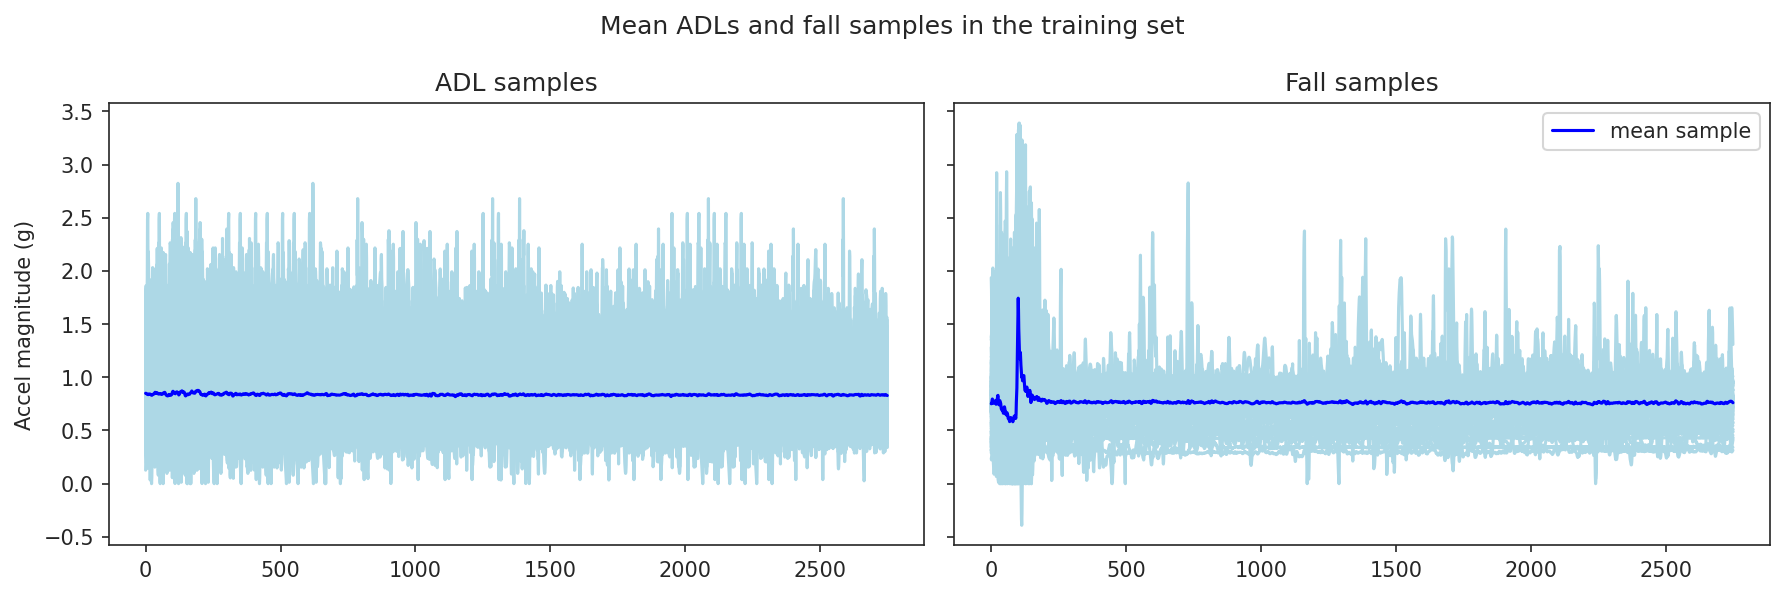

In [2]:
X_train, y_train, X_test, y_test = farseeing.train_test_subjects_split()

## Baselines with Tabular Models

In [71]:
tabular_metrics = None
for window_size in [2750, 700, 300]:
	if tabular_metrics is None:
		tabular_metrics = classifiers.run_tabular_models(
			X_train, y_train, X_test, y_test, window_size
		)
	else:
		new_metrics = classifiers.run_tabular_models(
			X_train, y_train, X_test, y_test, window_size
		)
		tabular_metrics = pd.concat([tabular_metrics, new_metrics])

> Logistic          (win_size=2750)	Training/Testing in 3.5 secs.
> RandomForest      (win_size=2750)	Training/Testing in 2.74 secs.
> KNN               (win_size=2750)	Training/Testing in 0.1 secs.
> Ridge             (win_size=2750)	Training/Testing in 0.02 secs.
> ExtraTrees        (win_size=2750)	Training/Testing in 0.55 secs.
> Logistic          (win_size=700)	Training/Testing in 0.41 secs.
> RandomForest      (win_size=700)	Training/Testing in 1.35 secs.
> KNN               (win_size=700)	Training/Testing in 0.06 secs.
> Ridge             (win_size=700)	Training/Testing in 0.01 secs.
> ExtraTrees        (win_size=700)	Training/Testing in 0.19 secs.
> Logistic          (win_size=300)	Training/Testing in 0.41 secs.
> RandomForest      (win_size=300)	Training/Testing in 0.93 secs.
> KNN               (win_size=300)	Training/Testing in 0.05 secs.
> Ridge             (win_size=300)	Training/Testing in 0.01 secs.
> ExtraTrees        (win_size=300)	Training/Testing in 0.19 secs.


In [72]:
tabular_metrics.sort_values(by='model').reset_index().drop(columns=['index'])

,model,window_size,runtime,precision,recall,f1-score
0,ExtraTrees,2750,0.547297,0.953488,0.803922,0.872340
1,ExtraTrees,700,0.194531,0.977273,0.843137,0.905263
2,ExtraTrees,300,0.193574,0.955556,0.843137,0.895833
3,KNN,2750,0.104437,0.774194,0.470588,0.585366
4,KNN,700,0.058148,0.960000,0.470588,0.631579
5,KNN,300,0.052366,0.954545,0.411765,0.575342
6,Logistic,2750,3.502326,0.871795,0.666667,0.755556
7,Logistic,700,0.414413,0.897436,0.686275,0.777778
8,Logistic,300,0.412128,0.875000,0.686275,0.769231
9,RandomForest,2750,2.736043,0.954545,0.823529,0.884211


In [73]:
crosstab = tabular_metrics.pivot_table('f1-score', ['model'], 'window_size')
crosstab

window_size,300,700,2750
model,,,
ExtraTrees,0.895833,0.905263,0.872340
KNN,0.575342,0.631579,0.585366
Logistic,0.769231,0.777778,0.755556
RandomForest,0.884615,0.860000,0.884211
Ridge,0.781609,0.786517,0.639175


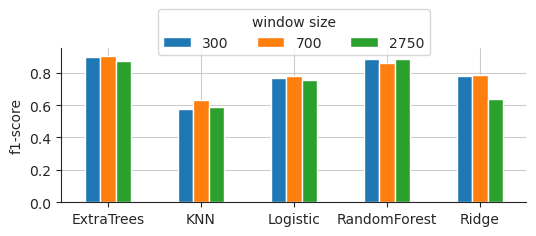

In [93]:
crosstab.plot(kind='bar', rot=0, figsize=(6,2))
plt.grid()
plt.xlabel('')
plt.ylabel('f1-score')
plt.legend(loc=9, ncol=3, bbox_to_anchor=(0.5,1.3), title='window size')
sns.despine()